<a href="https://colab.research.google.com/github/Sem8/deep-learning-udemy-granatyr/blob/main/Homework_salarayIncrease_section2_deep_learning_udemy_sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inputs outputs

use a dataset to train the single layer perceptron to learn this pattern. Instead of using the AND or OR operators, you should use the same code in order to classify whether a person will earn or not a salary increase.
Below you can see the input and output variables
Class "0" (zero) indicates a person won't earn a salary increase, otherwise, class "1" (one) indicates a person will earn a salary increase. After training the single layer perceptron, use the new instances below to make predictions. Will the instances below be classified 0 or 1?
Hint: you will need to normalize the inputs in order to train the neural network. You can use the MinMaxScaler from sklearn library


In [106]:
import numpy as np

In [107]:
inputs = np.array([[18,2], [20,3], [21, 4], [35,15], [36,16], [38, 18]])
print(inputs)
print(inputs.shape)

[[18  2]
 [20  3]
 [21  4]
 [35 15]
 [36 16]
 [38 18]]
(6, 2)


In [108]:
outputs = np.array([0, 0, 0, 1, 1, 1])
print(outputs)
print(outputs.shape)

[0 0 0 1 1 1]
(6,)


In [110]:
test_inputs = np.array([[17,5], [25,8], [45,10], [31,20]])

In [111]:
weights = np.array([0.0, 0.0])
weights

array([0., 0.])

In [112]:
learning_rate = 0.1

## MinMax scaler

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print('fit', scaler.fit(inputs))
print('data max', scaler.data_max_)
normalized_inputs = scaler.fit_transform(inputs)
print('normalized_inputs \n', inputs)

fit MinMaxScaler()
data max [38. 18.]
normalized_inputs 
 [[18  2]
 [20  3]
 [21  4]
 [35 15]
 [36 16]
 [38 18]]


## Step function

In [114]:
def step_function(sum):
  if (sum >= 1):
    return 1
  return 0

## Calculate output

In [115]:
def calculate_output(instance):
  s = instance.dot(weights)
  return step_function(s)

## Train

In [116]:
def train():
  total_error = 1
  while (total_error != 0):
    total_error = 0
    for i in range(len(outputs)):
      predicted = calculate_output(normalized_inputs[i])
      error = abs(outputs[i] - predicted)
      total_error += error
      if (error > 0):
        for j in range (len(weights)):
          weights[j] = weights[j] + (learning_rate * normalized_inputs[i][j] * error)
          print('Weight updated: ' + str(weights[j]))  
    print('Total error: ' + str(total_error))

In [117]:
train()

Weight updated: 0.085
Weight updated: 0.08125
Weight updated: 0.17500000000000002
Weight updated: 0.16875
Weight updated: 0.275
Weight updated: 0.26875000000000004
Total error: 3
Weight updated: 0.36000000000000004
Weight updated: 0.35000000000000003
Weight updated: 0.45000000000000007
Weight updated: 0.43750000000000006
Weight updated: 0.55
Weight updated: 0.5375000000000001
Total error: 3
Weight updated: 0.635
Weight updated: 0.6187500000000001
Total error: 1
Total error: 0


In [118]:
print('new weights \n', weights)

new weights 
 [0.635   0.61875]


## Graph

In [122]:
import pandas as pd
df1 = pd.DataFrame(data=inputs, columns=['age', 'education'])
df1

,age,education
0,18,2
1,20,3
2,21,4
3,35,15
4,36,16
5,38,18


In [123]:
df2 = pd.DataFrame(data=outputs, columns=['class'])
df2

,class
0,0
1,0
2,0
3,1
4,1
5,1


In [124]:
df = pd.concat([df1, df2], axis=1)
df

,age,education,class
0,18,2,0
1,20,3,0
2,21,4,0
3,35,15,1
4,36,16,1
5,38,18,1


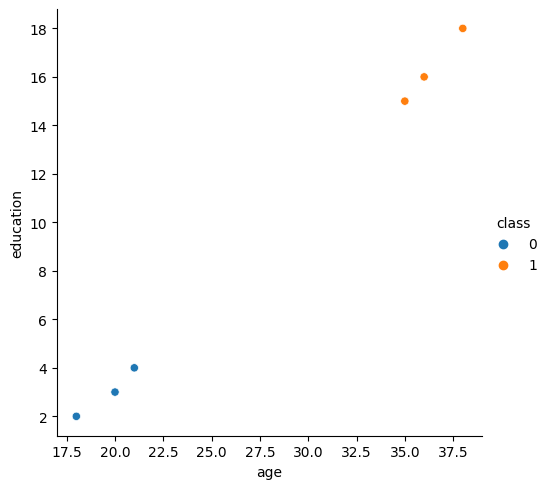

In [125]:
import seaborn as sns
sns.relplot(x="age", y='education', data=df, hue = 'class')

## Testing test outputs

In [121]:
def check_test_output(test_params):
  for i in range(len(test_params)):
    print(calculate_output(test_params[i]))


normalized_test_inputs = scaler.transform(test_inputs)
print('normalized_test_inputs \n', normalized_test_inputs)
check_test_output(normalized_test_inputs)

normalized_test_inputs 
 [[-0.05    0.1875]
 [ 0.35    0.375 ]
 [ 1.35    0.5   ]
 [ 0.65    1.125 ]]
0
0
1
1
